# Lab.8: Parsing

Consider the following sentence:

```
Lazy cats play with mice.
```

- Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.

- Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.

- For each one of them, provide the resulting tree, the number of edges and the list of explored edges.

- Which parser is the most efficient for parsing the sentence?

- Which edges are filtered out by each parser and why?

In [1]:
import nltk
import svgling

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/alberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alberto/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/alberto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/alberto/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Provided Example

|.  small  .   cats  .   and   .   mice  .|
|[---------]         .         .         .| [0:1] 'small'
|.         [---------]         .         .| [1:2] 'cats'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'mice'
|[---------]         .         .         .| [0:1] JJ -> 'small' *
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
|.         [---------]         .         .| [1:2] NNS -> 'cats' *
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
|[------------------->         .         .| [0:2] NP -> NP * CC NP
|.         [--------->         .         .| [1:2] NP -> NP * CC NP
|.         .         [---------]         .| [2:3] CC -> 'and' *
|.         [------------------->         .| [1:3] NNS -> NNS CC * NNS
|[----------------------------->         .| [0:3] NP -> NP CC * NP

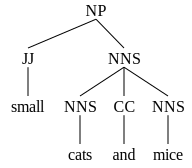

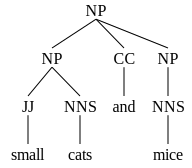

Number of trees 2


In [2]:
grammar1 = nltk.CFG.fromstring('''
                                NP  -> NNS | JJ NNS | NP CC NP
                                NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
                                JJ  -> "big" | "small"
                                CC  -> "and" | "or"
                                ''')

parser = nltk.ChartParser(grammar1, trace=1)

sent = ['small','cats','and','mice']

parse = parser.parse(sent)

ts = []
for t in parse:
  ts.append(t)
  display(svgling.draw_tree(t))
  
print('Number of trees', len(ts))



## Expand Grammar

In order to subsume our new sentence, we need to add the following rules to the grammar:

In [56]:

sentence = "Lazy cats play with mice"
grammar = nltk.CFG.fromstring('''
                                S   -> NP VP
                                NP  -> NNS | JJ NNS | NP CC NP
                                VP  -> VB NP | VB | VB PP
                                PP  -> IN NP
                                NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
                                JJ  -> "big" | "small" | "lazy"
                                CC  -> "and" | "or"
                                IN  -> "with"
                                VB  -> "play"
                                ''')

parser = nltk.ChartParser(grammar, trace=1)


## Constituency Parsers

Parser: BottomUpChartParser
|.  lazy .  cats .  play .  with .  mice .|
|[-------]       .       .       .       .| [0:1] 'lazy'
|.       [-------]       .       .       .| [1:2] 'cats'
|.       .       [-------]       .       .| [2:3] 'play'
|.       .       .       [-------]       .| [3:4] 'with'
|.       .       .       .       [-------]| [4:5] 'mice'
|>       .       .       .       .       .| [0:0] JJ -> * 'lazy'
|[-------]       .       .       .       .| [0:1] JJ -> 'lazy' *
|>       .       .       .       .       .| [0:0] NP -> * JJ NNS
|[------->       .       .       .       .| [0:1] NP -> JJ * NNS
|.       >       .       .       .       .| [1:1] NNS -> * 'cats'
|.       [-------]       .       .       .| [1:2] NNS -> 'cats' *
|.       >       .       .       .       .| [1:1] NP -> * NNS
|.       >       .       .       .       .| [1:1] NNS -> * NNS CC NNS
|[---------------]       .       .       .| [0:2] NP -> JJ NNS *
|.       [-------]       .       .       .| [1:2] NP -

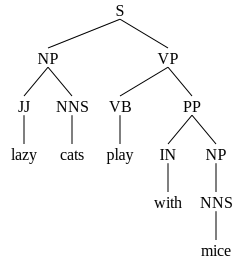

Parser: BottomUpLeftCornerChartParser
|.  lazy .  cats .  play .  with .  mice .|
|[-------]       .       .       .       .| [0:1] 'lazy'
|.       [-------]       .       .       .| [1:2] 'cats'
|.       .       [-------]       .       .| [2:3] 'play'
|.       .       .       [-------]       .| [3:4] 'with'
|.       .       .       .       [-------]| [4:5] 'mice'
|[-------]       .       .       .       .| [0:1] JJ -> 'lazy' *
|[------->       .       .       .       .| [0:1] NP -> JJ * NNS
|.       [-------]       .       .       .| [1:2] NNS -> 'cats' *
|.       [-------]       .       .       .| [1:2] NP -> NNS *
|.       [------->       .       .       .| [1:2] NNS -> NNS * CC NNS
|[---------------]       .       .       .| [0:2] NP -> JJ NNS *
|[--------------->       .       .       .| [0:2] S  -> NP * VP
|[--------------->       .       .       .| [0:2] NP -> NP * CC NP
|.       [------->       .       .       .| [1:2] S  -> NP * VP
|.       [------->       .       .       .| [

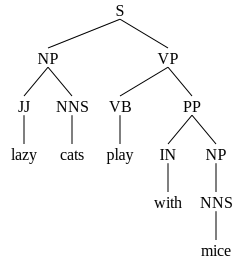

Parser: LeftCornerChartParser
|.  lazy .  cats .  play .  with .  mice .|
|[-------]       .       .       .       .| [0:1] 'lazy'
|.       [-------]       .       .       .| [1:2] 'cats'
|.       .       [-------]       .       .| [2:3] 'play'
|.       .       .       [-------]       .| [3:4] 'with'
|.       .       .       .       [-------]| [4:5] 'mice'
|[-------]       .       .       .       .| [0:1] JJ -> 'lazy' *
|[------->       .       .       .       .| [0:1] NP -> JJ * NNS
|.       [-------]       .       .       .| [1:2] NNS -> 'cats' *
|.       [-------]       .       .       .| [1:2] NP -> NNS *
|[---------------]       .       .       .| [0:2] NP -> JJ NNS *
|[--------------->       .       .       .| [0:2] S  -> NP * VP
|.       [------->       .       .       .| [1:2] S  -> NP * VP
|.       .       [-------]       .       .| [2:3] VB -> 'play' *
|.       .       [-------]       .       .| [2:3] VP -> VB *
|.       .       [------->       .       .| [2:3] VP -> VB * PP


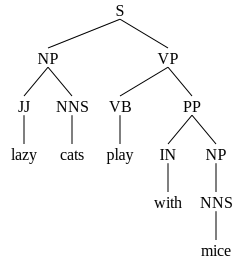

,Parser,N_Edges,Explored_Edges,Trees
0,BottomUpChartParser,52,"[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [...",1
1,BottomUpLeftCornerChartParser,32,"[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [...",1
2,LeftCornerChartParser,25,"[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [...",1


In [64]:
ls_parsers = [nltk.BottomUpChartParser, 
              nltk.BottomUpLeftCornerChartParser, 
              nltk.LeftCornerChartParser]

import pandas as pd
df_results = pd.DataFrame()
for parser in ls_parsers:

    name = parser.__name__

    print("=====================================")
    print("Parser:", name)
    print("=====================================")

    tokens = nltk.word_tokenize(sentence.lower())

    # Apply the parser
    bu_pa = parser(grammar, trace=1)

    # Extract the explored edges and trees
    chart = bu_pa.chart_parse(tokens)
    trees = bu_pa.parse_all(tokens)

    # SHow the explored edges
    print("\n\nExplored Edges:")
    for edge in chart.edges():
        print(edge)

    print("\n\nNumber of edges:", chart.num_edges())

    # Display the trees
    ts = []
    for t in trees:
        ts.append(t)
        display(svgling.draw_tree(t))

    # Save the results
    df_i = pd.DataFrame({"Parser": [name], 
                            "N_Edges": chart.num_edges(),
                            "Explored_Edges": str(chart.edges()),
                            "Trees": len(ts)})
    
    df_results = pd.concat([df_results, df_i], axis=0, ignore_index=True)

df_results

## Most Efficient Parser

**Answer**: Based on the provided statistics, the `LeftCornerChartParser` has the lowest number of edges and explored edges, making it potentially the most efficient parser for this specific sentence.

## Filtered Edges

The differences between the `BottomUpChartParser`, `BottomUpLeftCornerChartParser`, and `LeftCornerChartParser` lie in their parsing strategies, particularly in how they build parse trees and explore the search space during the parsing process.

1. **BottomUpChartParser:**
   - **Parsing Strategy:** This parser follows a bottom-up parsing strategy. It starts by identifying the individual words in the input and then gradually builds up larger syntactic structures until it reaches the complete parse tree.
   - **Edge Generation:** The parser generates edges representing partially parsed subtrees and incrementally combines them until a full parse tree is constructed.
   - **Search Space Exploration:** It explores the search space by considering possible combinations of grammar rules in a bottom-up fashion.

2. **BottomUpLeftCornerChartParser:**
   - **Parsing Strategy:** This parser is an extension of the `BottomUpChartParser` with a left-corner parsing strategy. Left-corner parsing involves looking for specific combinations of leftmost constituents in the grammar rules.
   - **Edge Generation:** It still follows a bottom-up approach but incorporates left-corner information, allowing it to make more informed decisions about which edges to explore.
   - **Search Space Exploration:** The left-corner strategy involves considering both the bottom-up construction of subtrees and the leftmost constituents, potentially leading to more efficient parsing.

3. **LeftCornerChartParser:**
   - **Parsing Strategy:** This parser employs a left-corner parsing strategy from the outset. It focuses on identifying leftmost constituents and uses this information to guide the parsing process.
   - **Edge Generation:** Unlike the `BottomUpChartParser`, this parser starts with left-corner information, generating edges based on leftmost constituents and building the parse tree accordingly.
   - **Search Space Exploration:** The left-corner strategy is used throughout the parsing process, potentially allowing for more efficient exploration of the search space by prioritizing left-corner combinations.

In [74]:
ls_explored_bu = df_results.loc[df_results["Parser"] == "BottomUpChartParser", "Explored_Edges"]
ls_explored_bu = ls_explored_bu.values[0]
ls_explored_bu = ls_explored_bu.replace("[[", "[").replace("]]", "]").split(", ")

ls_explored_blu = df_results.loc[df_results["Parser"] == "BottomUpLeftCornerChartParser", "Explored_Edges"]
ls_explored_blu = ls_explored_blu.values[0]
ls_explored_blu = ls_explored_blu.replace("[[", "[").replace("]]", "]").split(", ")

ls_explored_left = df_results.loc[df_results["Parser"] == "LeftCornerChartParser", "Explored_Edges"]
ls_explored_left = ls_explored_left.values[0]
ls_explored_left = ls_explored_left.replace("[[", "[").replace("]]", "]").split(", ")

print("Edges explored by BottomUpChartParser but not by BottomUpLeftCornerChartParser:")
[x for x in ls_explored_bu if x not in ls_explored_blu]

Edges explored by BottomUpChartParser but not by BottomUpLeftCornerChartParser:


["[Edge: [0:0] JJ -> * 'lazy']",
 '[Edge: [0:0] NP -> * JJ NNS]',
 "[Edge: [1:1] NNS -> * 'cats']",
 '[Edge: [1:1] NP -> * NNS]',
 '[Edge: [1:1] NNS -> * NNS CC NNS]',
 '[Edge: [1:1] S  -> * NP VP]',
 '[Edge: [1:1] NP -> * NP CC NP]',
 '[Edge: [0:0] S  -> * NP VP]',
 '[Edge: [0:0] NP -> * NP CC NP]',
 "[Edge: [2:2] VB -> * 'play']",
 '[Edge: [2:2] VP -> * VB NP]',
 '[Edge: [2:2] VP -> * VB]',
 '[Edge: [2:2] VP -> * VB PP]',
 "[Edge: [3:3] IN -> * 'with']",
 '[Edge: [3:3] PP -> * IN NP]',
 "[Edge: [4:4] NNS -> * 'mice']",
 '[Edge: [4:4] NP -> * NNS]',
 '[Edge: [4:4] NNS -> * NNS CC NNS]',
 '[Edge: [4:4] S  -> * NP VP]',
 '[Edge: [4:4] NP -> * NP CC NP]']

In [76]:
print("Edges explored by BottomUpLeftCornerChartParser but not by LeftCornerChartParser:")
[x for x in ls_explored_blu if x not in ls_explored_left]

Edges explored by BottomUpLeftCornerChartParser but not by LeftCornerChartParser:


['[Edge: [1:2] NNS -> NNS * CC NNS]',
 '[Edge: [0:2] NP -> NP * CC NP]',
 '[Edge: [1:2] NP -> NP * CC NP]',
 '[Edge: [2:3] VP -> VB * NP]',
 '[Edge: [4:5] NNS -> NNS * CC NNS]',
 '[Edge: [4:5] S  -> NP * VP]',
 '[Edge: [4:5] NP -> NP * CC NP]']

As it was shown in the previous table, the `BottomUpLeftCornerChartParser` explores 20 edges less than the `BottomUpChartParser` and `LeftCornerChartParser` explores 7 less than `BottomUpLeftCornerChartParser`. This is because the `BottomUpLeftCornerChartParser` filters out the edges that are not in the left-corner of the grammar.